In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt


## 1. Data Interpretation

In [2]:
# Read the data file
Data = pd.read_csv("C:/Users/Yash/Downloads/cc.csv" ,header=None)
Data.columns= ["Male","Age","Debt","Married","BankCustomer","EducationLevel","Ethnicity","YearsEmployed","PriorDefault","Employed","CreditScore","DriversLicense","Citizen","ZipCode","Income","Approved"]
Data

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:
Data.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


<AxesSubplot:>

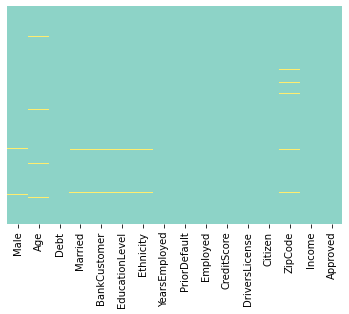

In [4]:
# Replace "?" with NaN
Data.replace('?', np.NaN, inplace = True)

# Convert Age to numeric
Data["Age"] = pd.to_numeric(Data["Age"])
sns.heatmap(Data.isnull(),cbar=False,yticklabels=False,cmap="Set3")

In [5]:
Data.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,678.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.957862,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


## 2. Data Visualization and Preparation 

<AxesSubplot:>

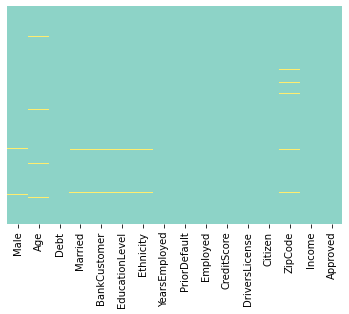

In [6]:
Data.isnull().sum()
sns.heatmap(Data.isnull(),cbar=False,yticklabels=False,cmap="Set3")

In [7]:
# # Imputing missing values for numerical columns with mean value
cols=["Male",
"Age"      ,         
"Debt"       ,        
"Married"     ,       
"BankCustomer" ,      
"EducationLevel",
"Ethnicity"      ,    
"YearsEmployed"  ,    
"PriorDefault"    ,   
"Employed"         ,  
"CreditScore"       , 
"DriversLicense"     ,
"Citizen"          ,
"ZipCode"        ,   
"Income"          ,  
"Approved"]
Data[cols]=Data[cols].fillna(Data.mean().iloc[0])

<AxesSubplot:>

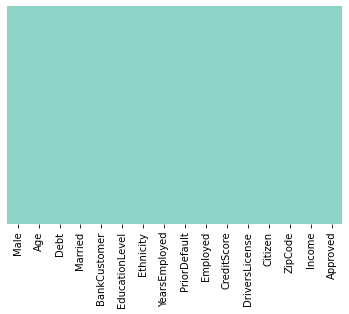

In [8]:
Data.isnull().sum()
sns.heatmap(Data.isnull(),cbar=False,yticklabels=False,cmap="Set3")

## 3. Data description and distribution

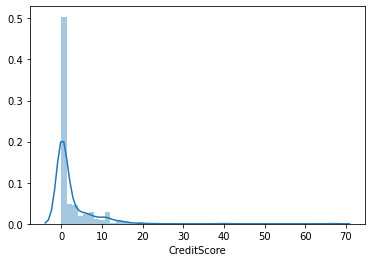

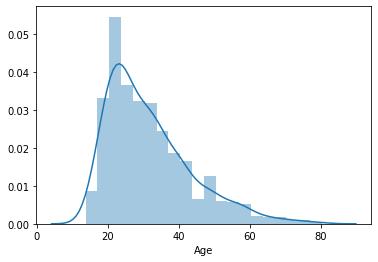

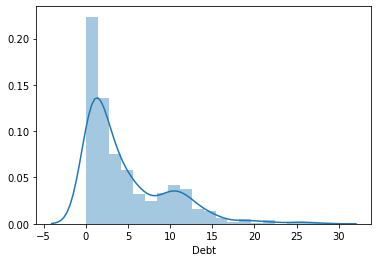

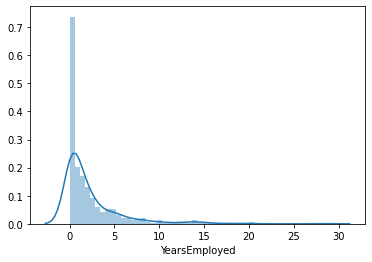

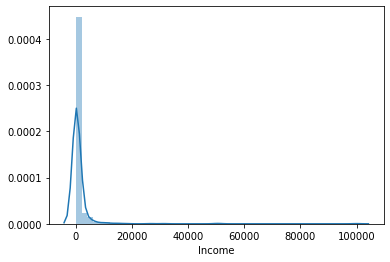

In [9]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()

plotDistPlot(Data['CreditScore'])
plotDistPlot(Data['Age'])
plotDistPlot(Data['Debt'])
plotDistPlot(Data['YearsEmployed'])
plotDistPlot(Data['Income'])

<AxesSubplot:xlabel='Approved', ylabel='count'>

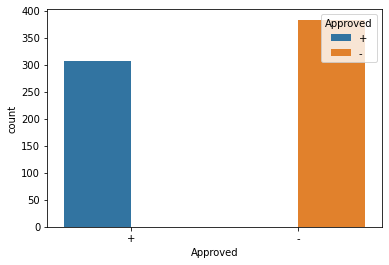

In [10]:
sns.countplot(data = Data, x = 'Approved',hue="Approved")

In [11]:
Data.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [12]:
print("shape of the data:", Data.shape)

shape of the data: (690, 16)


In [13]:
Data.nunique()

Male                3
Age               350
Debt              215
Married             4
BankCustomer        4
EducationLevel     15
Ethnicity          10
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           171
Income            240
Approved            2
dtype: int64

In [14]:
# cheaking null values in object type column and replacing them with mode of that column.
def replacing_nan(df):
    for col in df:
        if df[col].dtypes == 'object':

            df[col] = df[col].fillna(df[col].mode().iloc[0])
replacing_nan(Data)

In [15]:
Data.nunique()

Male                3
Age               350
Debt              215
Married             4
BankCustomer        4
EducationLevel     15
Ethnicity          10
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           171
Income            240
Approved            2
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in Data:
    if Data[col].dtypes=='object':
        Data[col]=le.fit_transform(Data[col].astype(str))

In [17]:
Data.tail(15)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
675,1,41.58,1.040,2,1,1,8,0.665,0,0,0,0,0,84,237,1
676,1,30.58,10.665,2,1,11,4,0.085,0,1,12,1,0,40,3,1
677,2,19.42,7.250,2,1,10,8,0.040,0,1,1,0,0,31,1,1
678,1,17.92,10.210,2,1,6,3,0.000,0,0,0,0,0,0,50,1
679,1,20.08,1.250,2,1,2,8,0.000,0,0,0,0,0,0,0,1
680,2,19.50,0.290,2,1,9,8,0.290,0,0,0,0,0,96,364,1
681,2,27.83,1.000,3,3,4,4,3.000,0,0,0,0,0,60,537,1
682,2,17.08,3.290,2,1,7,8,0.335,0,0,0,1,0,44,2,1
683,2,36.42,0.750,3,3,4,8,0.585,0,0,0,0,0,84,3,1
684,2,40.58,3.290,2,1,10,8,3.500,0,0,0,1,2,129,0,1


## 4. Applying ML algo

In [18]:
# Removing the feature which are not important.
from sklearn.model_selection import train_test_split
Data = Data.drop(['DriversLicense', 'ZipCode'], axis=1)
Data = Data.values

In [19]:
# Creating new variable to input features and labels
X,y = Data[:,0:13] , Data[:,13]

# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

In [20]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)
y_train[0]


0.0

In [21]:
rescaledX = scaler.transform(X)

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(rescaledX_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(rescaledX_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
print("f_score:",metrics.f1_score(Y_test, y_pred))

Accuracy: 0.7898550724637681
Precision: 0.7640449438202247
Recall: 0.8947368421052632
f_score: 0.8242424242424243


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
print("f_score:",metrics.f1_score(Y_test, y_pred))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Random Forest classifier has accuracy of:  0.8695652173913043
Precision: 0.8372093023255814
Recall: 0.9473684210526315
f_score: 0.8888888888888888


array([[48, 14],
       [ 4, 72]], dtype=int64)

In [34]:
pickle.dump(rf,open("model.pkl","wb"))
model=pickle.load(open("model.pkl","rb"))


According to the Random Forest Classifier, PriorDefault is the most important feature, followed by Credit Score and Employment status.

In [24]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Fitting logistic regression with default parameter values
logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Using the trained model to predict instances from the test set
y_pred = logreg.predict(rescaledX_test)

# Getting the accuracy score of predictive model
print("Logistic regression classifier has accuracy of: ", logreg.score(rescaledX_test, Y_test))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
print("f_score:",metrics.f1_score(Y_test, y_pred))

Logistic regression classifier has accuracy of:  0.855072463768116
Precision: 0.868421052631579
Recall: 0.868421052631579
f_score: 0.868421052631579


In [26]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC() # Linear Kernel

#Train the model using the training sets
clf.fit(rescaledX_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(rescaledX_test)

In [27]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
print("f_score:",metrics.f1_score(Y_test, y_pred))

Accuracy: 0.8768115942028986
Precision: 0.8831168831168831
Recall: 0.8947368421052632
f_score: 0.8888888888888888


In [28]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(rescaledX_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(rescaledX_test)

In [29]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
print("f_score:",metrics.f1_score(Y_test, y_pred))

Accuracy: 0.8333333333333334
Precision: 0.7676767676767676
Recall: 1.0
f_score: 0.8685714285714284


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(rescaledX_train, y_train)
y_pred = clf.predict(rescaledX_test)


In [31]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))
print("f_score:",metrics.f1_score(Y_test, y_pred))

Accuracy: 0.8623188405797102
Precision: 0.8352941176470589
Recall: 0.9342105263157895
f_score: 0.8819875776397516
